# Supply Chain Mangement Software:


In [3]:
import numpy as np
import pandas as pd
# pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [4]:
df = pd.read_csv("supply_chain.csv", encoding='latin-1')

In [5]:
df.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [6]:
df.shape

(10324, 33)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

# Cleaning


In [8]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


In [9]:
 # Drop ID column
df.drop('ID', axis=1, inplace=True)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unit of Measure (Per Pack),10324.0,77.990895,76.579764,1.0,30.0000,60.000,90.0000,1000.00
Line Item Quantity,10324.0,18332.534870,40035.302961,1.0,408.0000,3000.000,17039.7500,619999.00
Line Item Value,10324.0,157650.567347,345292.066979,0.0,4314.5925,30471.465,166447.1400,5951990.40
Pack Price,10324.0,21.910241,45.609223,0.0,4.1200,9.300,23.5925,1345.64
Unit Price,10324.0,0.611701,3.275808,0.0,0.0800,0.160,0.4700,238.65
Line Item Insurance (USD),10037.0,240.117626,500.190568,0.0,6.5100,47.040,252.4000,7708.44


In [11]:

df["Shipment Mode"].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

In [12]:
df["Shipment Mode"].unique()

array(['Air', nan, 'Truck', 'Air Charter', 'Ocean'], dtype=object)

# Data Cleaning

In [13]:
# Drop empty Shipment mode rows
missing_target_rows = df[df['Shipment Mode'].isna()].index
df = df.drop(missing_target_rows, axis=0).reset_index(drop=True)

In [35]:
# Fill missing values
df['Dosage'] = df['Dosage'].fillna(df['Dosage'].mode()[0])
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(df['Line Item Insurance (USD)'].mean())

In [14]:
for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
        df[column] = pd.to_datetime(df[column])
        df[column + ' Year'] = df[column].apply(lambda x: x.year)
        df[column + ' Month'] = df[column].apply(lambda x: x.month)
        df[column + ' Day'] = df[column].apply(lambda x: x.day)
        df = df.drop(column, axis=1)

In [15]:
# Drop numeric columns with too many missing values
df = df.drop(['Weight (Kilograms)', 'Freight Cost (USD)'], axis=1)
# Drop high-cardinality columns
df = df.drop(['PQ #', 'PO / SO #', 'ASN/DN #'], axis=1)

In [16]:
# Binary encoding
df['Fulfill Via'] = df['Fulfill Via'].replace({'Direct Drop': 0, 'From RDC': 1})
df['First Line Designation'] = df['First Line Designation'].replace({'No': 0, 'Yes': 1})

In [17]:
df.head()

,Project Code,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Product Group,Sub Classification,...,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
0,100-CI-T01,Côte d'Ivoire,PMO - US,0,EXW,Air,Pre-PQ Process,Date Not Captured,HRDT,HIV test,...,NaN,2006,6,2,2006,6,2,2006,6,2
1,108-VN-T01,Vietnam,PMO - US,0,EXW,Air,Pre-PQ Process,Date Not Captured,ARV,Pediatric,...,NaN,2006,11,14,2006,11,14,2006,11,14
2,100-CI-T01,Côte d'Ivoire,PMO - US,0,FCA,Air,Pre-PQ Process,Date Not Captured,HRDT,HIV test,...,NaN,2006,8,27,2006,8,27,2006,8,27
3,108-VN-T01,Vietnam,PMO - US,0,EXW,Air,Pre-PQ Process,Date Not Captured,ARV,Adult,...,NaN,2006,9,1,2006,9,1,2006,9,1
4,108-VN-T01,Vietnam,PMO - US,0,EXW,Air,Pre-PQ Process,Date Not Captured,ARV,Adult,...,NaN,2006,8,11,2006,8,11,2006,8,11


In [18]:
df.shape

(9964, 33)

In [19]:
df["Shipment Mode"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
9959    False
9960    False
9961    False
9962    False
9963    False
Name: Shipment Mode, Length: 9964, dtype: bool

### Mode for Shipments:

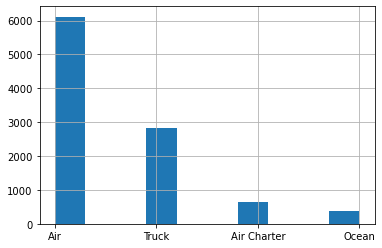

In [20]:
df["Shipment Mode"].hist();

### Freight Cost:

<Figure size 1080x864 with 0 Axes>

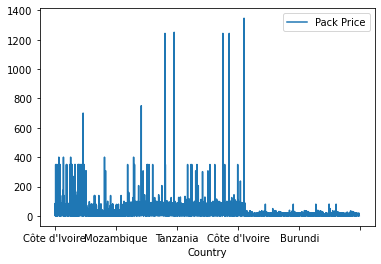

In [21]:
# freigth cost = It is the amount paid to a carrier company for the transportation of goods from the point of origin to an agreed location.
plt.figure(figsize=(15, 12))
df.plot(x='Country', y='Pack Price');

In [22]:
pd.crosstab(df["Country"], df["Shipment Mode"]).transpose()

Country,Afghanistan,Angola,Belize,Benin,Botswana,Burkina Faso,Burundi,Cameroon,"Congo, DRC",Côte d'Ivoire,...,South Africa,South Sudan,Sudan,Swaziland,Tanzania,Togo,Uganda,Vietnam,Zambia,Zimbabwe
Shipment Mode,,,,,,,,,,,,,,,,,,,,,
Air,3,5,1,13,63,2,98,61,331,682,...,230,162,46,32,306,3,534,687,195,145
Air Charter,0,0,0,0,0,0,0,14,0,5,...,0,0,0,0,0,0,0,0,0,18
Ocean,0,0,0,0,0,0,0,0,0,5,...,229,0,0,2,6,0,8,0,3,3
Truck,0,2,0,0,4,0,0,0,2,278,...,905,2,0,1,187,0,229,1,386,360


In [23]:
df.corr()

,Fulfill Via,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
Fulfill Via,1.000000,-0.066286,0.178380,0.134697,-0.263672,-0.176233,-0.107475,0.130599,-0.114086,-0.020507,0.181700,-0.112725,-0.040586,0.030974,-0.111667,-0.031409,-0.001005
Unit of Measure (Per Pack),-0.066286,1.000000,-0.149098,-0.125568,0.096485,-0.136810,0.005729,-0.128585,-0.054088,0.000859,-0.007986,-0.054040,0.001577,-0.004242,-0.053755,-0.002557,-0.003095
Line Item Quantity,0.178380,-0.149098,1.000000,0.840036,-0.132249,-0.070575,0.063985,0.799634,0.109363,0.010238,0.040147,0.109251,0.004636,-0.014033,0.109208,0.007649,-0.025125
Line Item Value,0.134697,-0.125568,0.840036,1.000000,-0.016801,-0.023601,0.095950,0.960989,0.092921,0.002315,0.037306,0.092650,0.000503,0.004564,0.092425,0.004847,-0.000809
Pack Price,-0.263672,0.096485,-0.132249,-0.016801,1.000000,0.310204,0.120544,-0.014081,-0.050999,0.010333,-0.075506,-0.049853,0.013922,-0.019880,-0.050175,0.014286,-0.003452
Unit Price,-0.176233,-0.136810,-0.070575,-0.023601,0.310204,1.000000,0.087150,-0.025903,0.010756,-0.006372,-0.028432,0.011427,-0.003479,0.001083,0.011127,-0.001895,0.008265
First Line Designation,-0.107475,0.005729,0.063985,0.095950,0.120544,0.087150,1.000000,0.114658,-0.086759,0.034742,-0.061156,-0.084635,0.033472,-0.016052,-0.084120,0.028613,-0.018586
Line Item Insurance (USD),0.130599,-0.128585,0.799634,0.960989,-0.014081,-0.025903,0.114658,1.000000,0.002791,0.012715,0.019502,0.003167,0.010685,0.000179,0.002840,0.012932,-0.002646
Scheduled Delivery Date Year,-0.114086,-0.054088,0.109363,0.092921,-0.050999,0.010756,-0.086759,0.002791,1.000000,-0.141438,0.089143,0.998026,-0.140033,0.003970,0.997816,-0.125705,0.002710
Scheduled Delivery Date Month,-0.020507,0.000859,0.010238,0.002315,0.010333,-0.006372,0.034742,0.012715,-0.141438,1.000000,-0.019805,-0.129285,0.888824,0.012431,-0.127541,0.875319,-0.009326


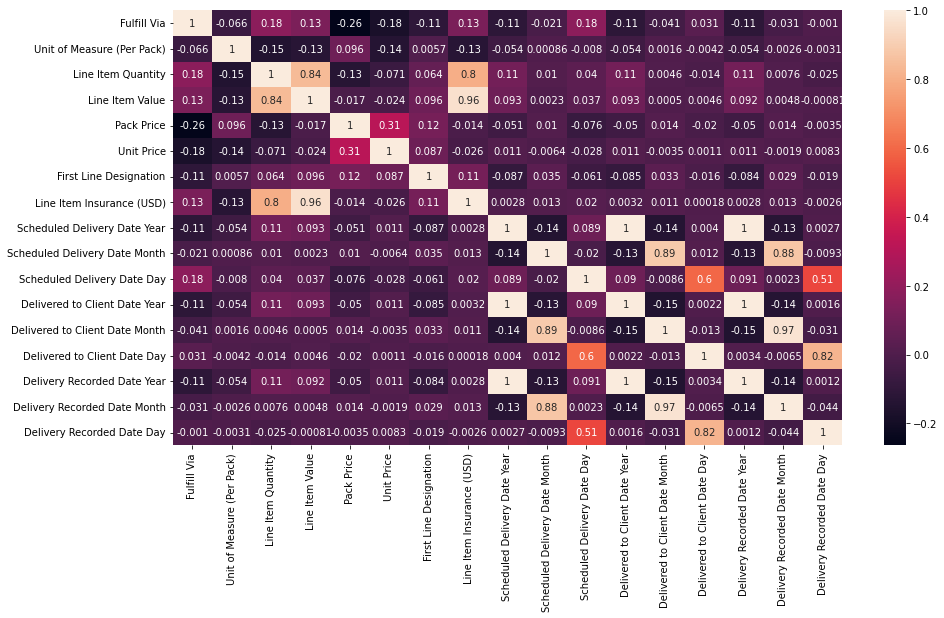

In [24]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True);

D:\Other-Languages\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Country Name')

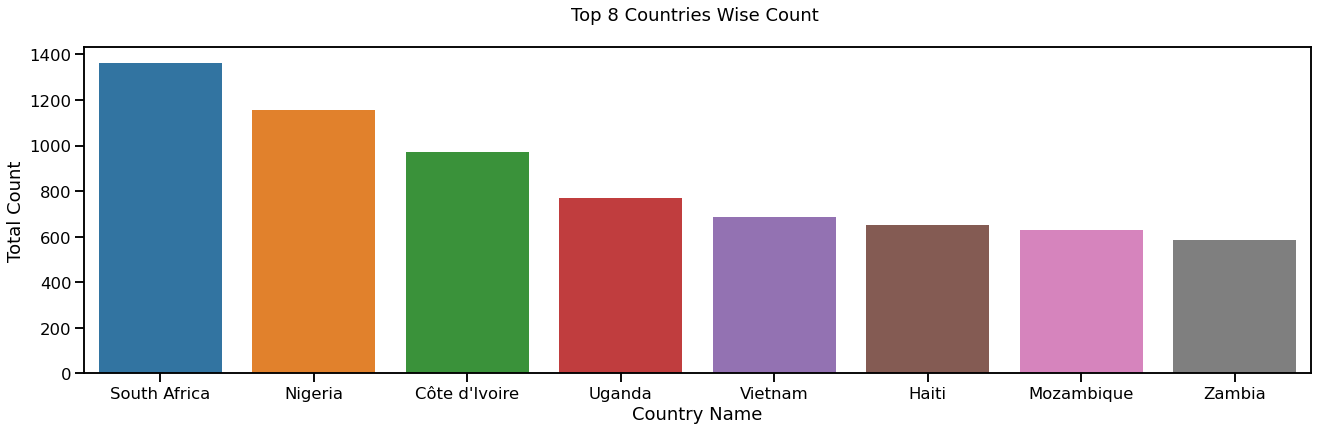

In [25]:
DataSet = df.copy()
ItemCount = DataSet["Country"].value_counts().nlargest(8)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,6))
sns.countplot(DataSet['Country'],order = DataSet['Country'].value_counts().nlargest(8).index);
plt.title('Top 8 Countries Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('Country Name')

Text(0.5, 0, 'Country Name')

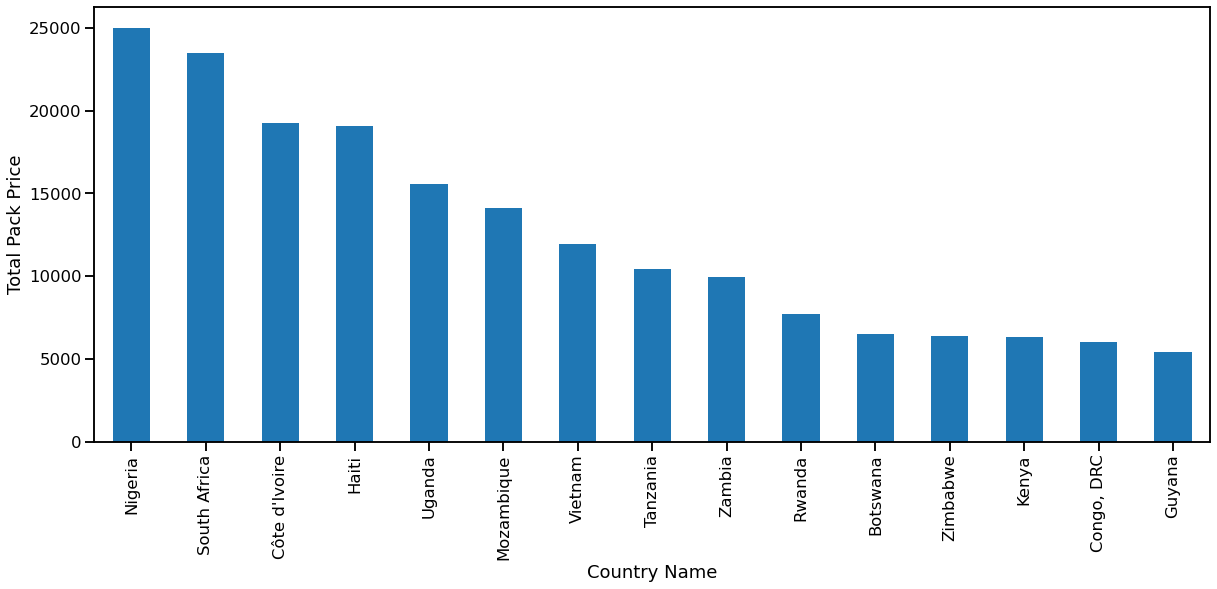

In [26]:
TotalPrice = DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
plt.figure(figsize=(20,8))
GraphData=DataSet.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar');
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

D:\Other-Languages\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'First Line Designation')

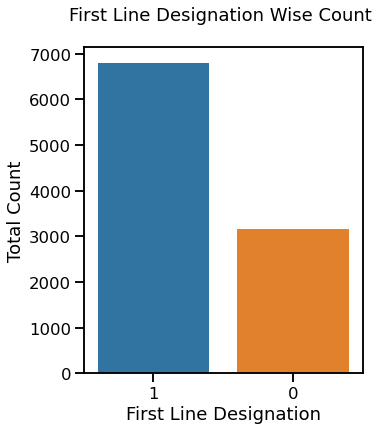

In [27]:
plt.figure(figsize=(5,6))
sns.countplot(DataSet['First Line Designation'],order = DataSet['First Line Designation'].value_counts().nlargest(10).index)
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

In [28]:
ShippingMode = DataSet["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

Manufacturing Site
Aurobindo Unit III, India         3031
Mylan (formerly Matrix) Nashik    1407
Hetero Unit III Hyderabad IN       868
Cipla, Goa, India                  634
Strides, Bangalore, India.         533
Alere Medical Co., Ltd.            481
Trinity Biotech, Plc               395
ABBVIE Ludwigshafen Germany        354
Inverness Japan                    337
ABBVIE (Abbott) Logis. UK          207
dtype: int64


Text(0.5, 0, 'Manufacturing Site Name')

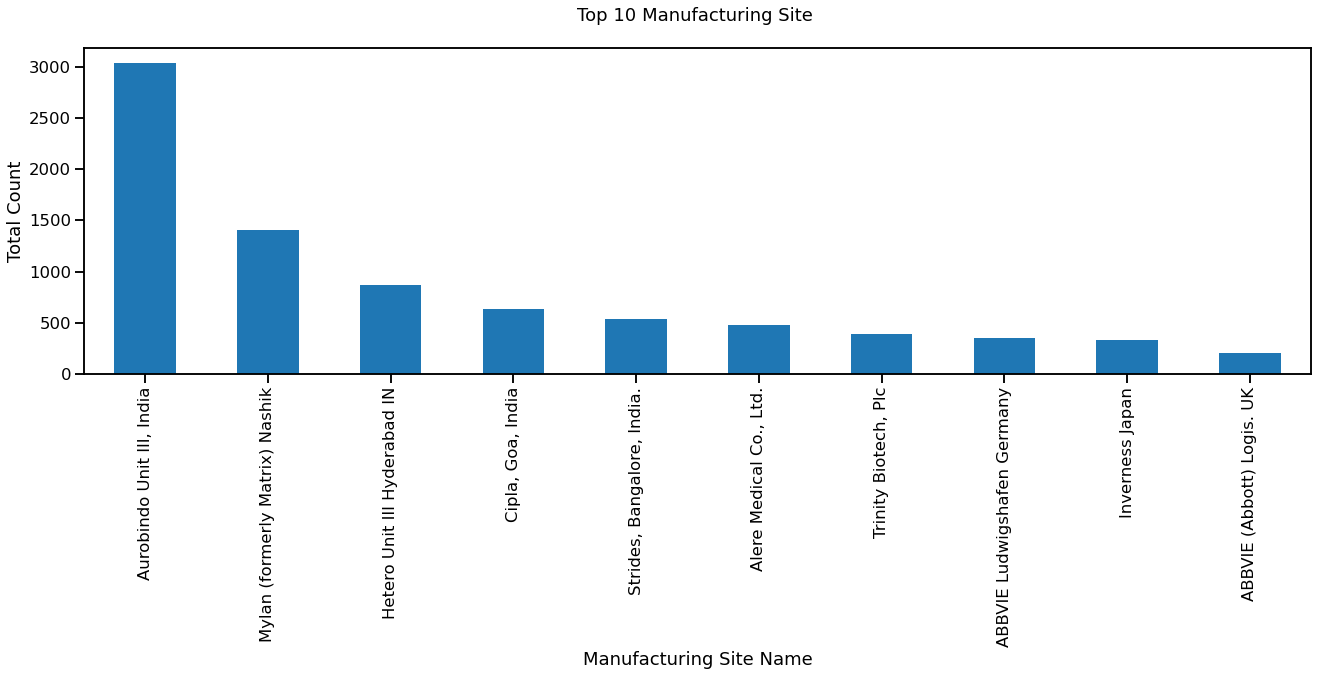

In [29]:
plt.figure(figsize=(22,6))
TopFiveManufacturingSite=DataSet.groupby('Manufacturing Site').size().nlargest(10)
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.title('Top 10 Manufacturing Site \n')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site Name')

Top 10 Ocean Manufacturing Site 

Aurobindo Unit III, India                                                   177
Cipla, Goa, India                                                            49
Mylan (formerly Matrix) Nashik                                               44
Hetero Unit III Hyderabad IN                                                 29
Strides, Bangalore, India.                                                   27
GSK Mississauga (Canada)                                                      9
Aurobindo Unit VII, IN                                                        7
ABBVIE Ludwigshafen Germany                                                   5
Micro labs, Verna, Goa, India                                                 5
Emcure Plot No.P-2, I.T-B.T. Park, Phase II, MIDC, Hinjwadi, Pune, India      5
Name: Manufacturing Site, dtype: int64


Text(0.5, 0, 'Manufacturing Site')

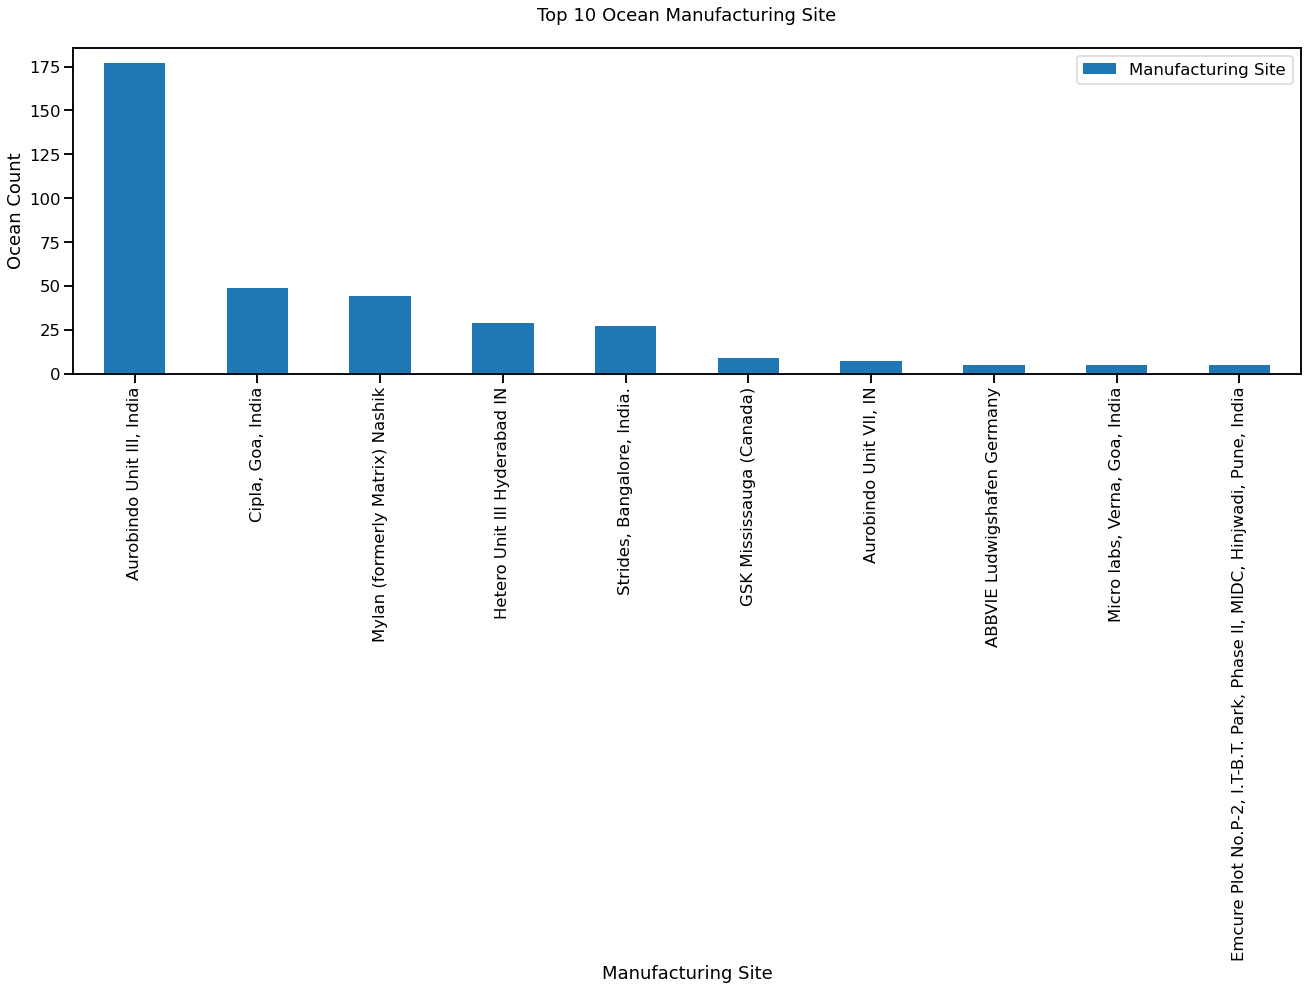

In [30]:
ItemData=DataSet[DataSet['Shipment Mode']=='Ocean']
DataSet[DataSet["Shipment Mode"]=='Ocean']['Manufacturing Site'].value_counts()[0:10].to_frame().plot.bar(figsize=(22,6))
ItemSupplier = DataSet[DataSet["Shipment Mode"]=='Ocean']['Manufacturing Site'].value_counts()[0:10]
print("Top 10 Ocean Manufacturing Site \n")
print(ItemSupplier)
plt.title('Top 10 Ocean Manufacturing Site\n')
plt.ylabel('Ocean Count')
plt.xlabel('Manufacturing Site')